In [61]:
import pandas as pd

# 合并(merge)数据框

In [62]:
课程信息 = pd.DataFrame({
    '课程': ['高数', '线代', '英语'],
    '学分': [6, 4, 3]
})
成绩 = pd.DataFrame({
    '姓名': ['张三', '张三', '李四', '王五'],
    '课程': ['高数', '线代', '高数', '马哲'],
    '成绩': [91, 88, 78, 95]
})

display(课程信息); display(成绩)

,课程,学分
0,高数,6
1,线代,4
2,英语,3


,姓名,课程,成绩
0,张三,高数,91
1,张三,线代,88
2,李四,高数,78
3,王五,马哲,95


In [3]:
成绩.merge(课程信息, on='课程')

,姓名,课程,成绩,学分
0,张三,高数,91,6
1,李四,高数,78,6
2,张三,线代,88,4


<br>

多对多的情况：

In [65]:
课程信息2 = pd.DataFrame({
    '课程': ['高数', '线代', '高数'],
    '学分': [6, 4, 3]
})
display(成绩); display(课程信息2);

成绩.merge(课程信息2, on='课程')

,姓名,课程,成绩
0,张三,高数,91
1,张三,线代,88
2,李四,高数,78
3,王五,马哲,95


,课程,学分
0,高数,6
1,线代,4
2,高数,3


,姓名,课程,成绩,学分
0,张三,高数,91,6
1,张三,高数,91,3
2,李四,高数,78,6
3,李四,高数,78,3
4,张三,线代,88,4


# 合并数据的连接类型

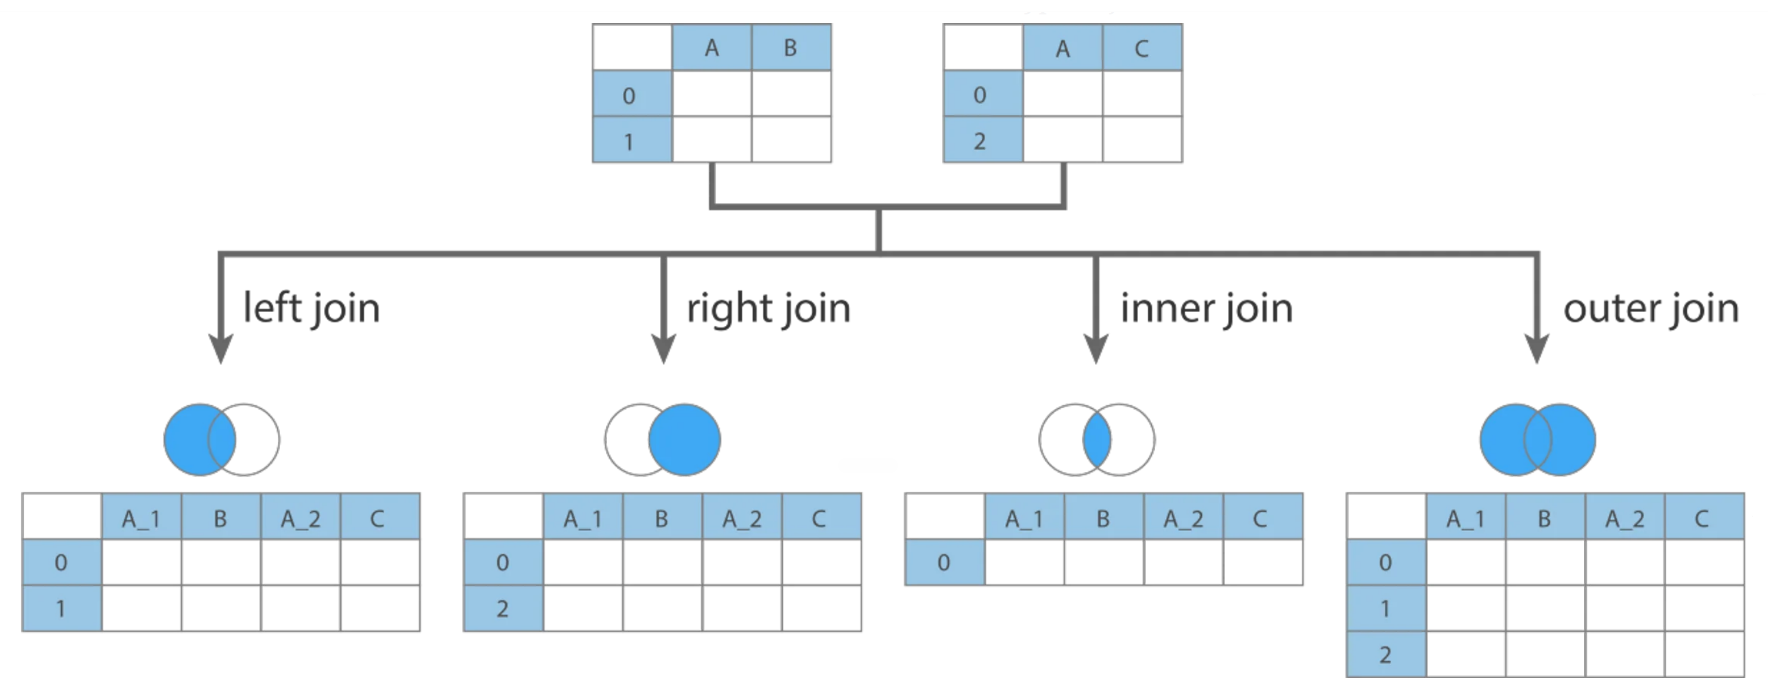

### 内连接(inner join)

In [5]:
成绩.merge(课程信息, on='课程')

,姓名,课程,成绩,学分
0,张三,高数,91,6
1,李四,高数,78,6
2,张三,线代,88,4


In [6]:
成绩.merge(课程信息, how='inner', on='课程')

,姓名,课程,成绩,学分
0,张三,高数,91,6
1,李四,高数,78,6
2,张三,线代,88,4


In [66]:
成绩.merge(课程信息)

,姓名,课程,成绩,学分
0,张三,高数,91,6
1,李四,高数,78,6
2,张三,线代,88,4


### 左连接(left join)



In [67]:
成绩.merge(课程信息, how="left", on="课程")

,姓名,课程,成绩,学分
0,张三,高数,91,6.0
1,张三,线代,88,4.0
2,李四,高数,78,6.0
3,王五,马哲,95,NaN


### 右连接(right join)



In [68]:
display(成绩); display(课程信息);

,姓名,课程,成绩
0,张三,高数,91
1,张三,线代,88
2,李四,高数,78
3,王五,马哲,95


,课程,学分
0,高数,6
1,线代,4
2,英语,3


In [9]:
成绩.merge(课程信息, how="right", on="课程")

,姓名,课程,成绩,学分
0,张三,高数,91.0,6
1,李四,高数,78.0,6
2,张三,线代,88.0,4
3,NaN,英语,NaN,3


### 外连接(outer join)


In [10]:
成绩.merge(课程信息, how="outer", on="课程")

,姓名,课程,成绩,学分
0,张三,高数,91.0,6.0
1,李四,高数,78.0,6.0
2,张三,线代,88.0,4.0
3,王五,马哲,95.0,NaN
4,NaN,英语,NaN,3.0



### 左右两侧具有相同的列名

In [11]:
df1  = pd.DataFrame({
    '姓名': ['张三', '李四', '王五'],
    '籍贯': ['山东', '北京', '天津']
})

df2 = pd.DataFrame({
    '姓名': ['张三', '李四'],
    '籍贯': ['山东', '北京']
})

display(df1); display(df2)

,姓名,籍贯
0,张三,山东
1,李四,北京
2,王五,天津


,姓名,籍贯
0,张三,山东
1,李四,北京


In [12]:
df1.merge(df2, how="outer", on="姓名")

,姓名,籍贯_x,籍贯_y
0,张三,山东,山东
1,李四,北京,北京
2,王五,天津,NaN


使用参数`suffixes`指明左右两侧的相同名字附加后缀的内容

In [13]:
df1.merge(df2, how="outer", on="姓名", suffixes=('_df1','_df2'))

,姓名,籍贯_df1,籍贯_df2
0,张三,山东,山东
1,李四,北京,北京
2,王五,天津,NaN


### 使用行索引标签作为连接条件

In [71]:
课程信息

,课程,学分
0,高数,6
1,线代,4
2,英语,3


In [73]:
df2 = 课程信息.set_index('课程')
df2

,学分
课程,
高数,6
线代,4
英语,3


使用`left_index`、`right_index`、`left_on`和`right_on`指明哪侧使用index(行索引)、哪侧使用是列作为左右连接的条件

In [74]:
成绩.merge(df2, how="inner", right_index = True, left_on="课程")

,姓名,课程,成绩,学分
0,张三,高数,91,6
2,李四,高数,78,6
1,张三,线代,88,4


<br>

# 拼接(concatenate)数据框

In [75]:
成绩1 = pd.DataFrame({
    '姓名': ['张三', '张三'],
    '课程': ['高数', '线代'],
    '成绩': [91, 88]
})

成绩2 = pd.DataFrame({
    '姓名': ['张三', '李四', '王五'],
    '课程': ['线代', '高数', '马哲'],
    '成绩': [88, 78, 95],
    '学分': [4, 6, 3]
})

display(成绩1); display(成绩2)

,姓名,课程,成绩
0,张三,高数,91
1,张三,线代,88


,姓名,课程,成绩,学分
0,张三,线代,88,4
1,李四,高数,78,6
2,王五,马哲,95,3


In [76]:
df3 = pd.concat([成绩1, 成绩2])
df3

,姓名,课程,成绩,学分
0,张三,高数,91,NaN
1,张三,线代,88,NaN
0,张三,线代,88,4.0
1,李四,高数,78,6.0
2,王五,马哲,95,3.0


In [18]:
df3.loc[1]

,姓名,课程,成绩,学分
1,张三,线代,88,NaN
1,李四,高数,78,6.0


In [19]:
df3 = pd.concat([成绩1, 成绩2], ignore_index=True)
df3

,姓名,课程,成绩,学分
0,张三,高数,91,NaN
1,张三,线代,88,NaN
2,张三,线代,88,4.0
3,李四,高数,78,6.0
4,王五,马哲,95,3.0


In [81]:
df3 = pd.concat([成绩1, 成绩2]).reset_index(drop=True)
df3

,姓名,课程,成绩,学分
0,张三,高数,91,NaN
1,张三,线代,88,NaN
2,张三,线代,88,4.0
3,李四,高数,78,6.0
4,王五,马哲,95,3.0


In [93]:
dft = df3.value_counts(['姓名', '课程'])
dft[dft > 1].index

MultiIndex([('张三', '线代')],
           names=['姓名', '课程'])

In [95]:
df3.set_index(['姓名', '课程']).loc[dft[dft > 1].index]

成绩   学分
姓名 课程         
张三 线代  88  NaN
   线代  88  4.0

In [22]:
dft = df3.value_counts(['姓名', '课程'])
df3.set_index(['姓名', '课程']).loc[dft[dft > 1].index]

成绩   学分
姓名 课程         
张三 线代  88  NaN
   线代  88  4.0

In [23]:
df3.drop_duplicates(['姓名', '课程'])

,姓名,课程,成绩,学分
0,张三,高数,91,NaN
1,张三,线代,88,NaN
3,李四,高数,78,6.0
4,王五,马哲,95,3.0


In [96]:
df3.drop_duplicates(['姓名', '课程'], keep='last')

,姓名,课程,成绩,学分
0,张三,高数,91,NaN
2,张三,线代,88,4.0
3,李四,高数,78,6.0
4,王五,马哲,95,3.0


In [97]:
df3.drop_duplicates(['姓名', '课程'], keep='last').reset_index(drop=True)

,姓名,课程,成绩,学分
0,张三,高数,91,NaN
1,张三,线代,88,4.0
2,李四,高数,78,6.0
3,王五,马哲,95,3.0


In [26]:
pd.concat([成绩1, 成绩2], axis=1)

,姓名,课程,成绩,姓名,课程,成绩,学分
0,张三,高数,91.0,张三,线代,88,4
1,张三,线代,88.0,李四,高数,78,6
2,NaN,NaN,NaN,王五,马哲,95,3


In [27]:
pd.concat([
    成绩1.set_index(['姓名', '课程']), 
    成绩2.set_index(['姓名', '课程'])], axis=1)

成绩    成绩   学分
姓名 课程                 
张三 高数  91.0   NaN  NaN
   线代  88.0  88.0  4.0
李四 高数   NaN  78.0  6.0
王五 马哲   NaN  95.0  3.0

# 数据框的差异比较

In [98]:
df1 = pd.DataFrame({
    '姓名': ['张三', '李四', '王五'],
    '成绩': [91, 78, 95]
})

df2 = pd.DataFrame({
    '姓名': ['张三',  '王五'],
    '成绩': [91, 95]
})
display(df1); display(df2)

,姓名,成绩
0,张三,91
1,李四,78
2,王五,95


,姓名,成绩
0,张三,91
1,王五,95


In [105]:
pd.merge(df1, df2, how='outer', indicator=True)

,姓名,成绩,_merge
0,张三,91,both
1,李四,78,left_only
2,王五,95,both


In [106]:
diff = pd.merge(df1, df2, indicator=True, how='left')
diff[diff['_merge'] == 'left_only']

,姓名,成绩,_merge
1,李四,78,left_only


In [107]:
df1 = pd.DataFrame({
    '姓名': ['张三', '李四', '王五'],
    '成绩': [91, 78, 95]
})

df2 = pd.DataFrame({
    '姓名': ['张三', '李四', '王五'],
    '成绩': [91, 78, 96]
})


df1.compare(df2)

成绩      
   self other
2  95.0  96.0

In [108]:
df1 = pd.DataFrame({
    '姓名': ['张三',  '王五', '李四' ],
    '成绩': [91, 95, 78]
})

df2 = pd.DataFrame({
    '姓名': ['张三', '李四', '王五'],
    '成绩': [91, 78, 96]
})


df1.compare(df2)

姓名          成绩      
  self other  self other
1   王五    李四  95.0  78.0
2   李四    王五  78.0  96.0